In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [4]:
path2root = "../../"
sbj_num = 12
subjects_fol = "subjects/"
sampling_test_fol = "sampling-test/"

In [5]:
sampling_test_dir = path2root + subjects_fol + f"{sbj_num}/" + sampling_test_fol

with open(sampling_test_dir + "t.pickle", 'rb') as f:
    t = pickle.load(f)
with open(sampling_test_dir + "y-hat-boi.pickle", 'rb') as f:
    boi = pickle.load(f)
with open(sampling_test_dir + "y-hat-et.pickle", 'rb') as f:
    et = pickle.load(f)
    
n_smp = et.shape[0]

In [6]:
x = et[:, 0]
y = et[:, 1]

In [7]:
x_med = signal.medfilt(x, 5)
y_med = signal.medfilt(y, 5)

In [8]:
vx = x_med.copy()
vy = y_med.copy()
# vx[1:] = (x_med[1:] - x_med[:-1]) / (t[1:] - t[:-1])
# vy[1:] = (y_med[1:] - y_med[:-1]) / (t[1:] - t[:-1])
vx[1:] = (x_med[1:] - x_med[:-1])
vy[1:] = (y_med[1:] - y_med[:-1])
vx[0] = vx[1]
vy[0] = vy[1]

In [9]:
FPS = 15
T = 1/FPS
T_DISCARD = 0.15
X_MERGE = 0.1
Y_MERGE = 0.1
VX_THR = 0.18
VY_THR = 0.18

In [10]:
n_discard = T_DISCARD / T

sac1_x = vx > VX_THR
sac2_x = vx < -VX_THR
sac1_y = vy > VY_THR
sac2_y = vy < -VY_THR
sac_x = sac1_x + sac2_x
sac_y = sac1_y + sac2_y
sac = sac_x + sac_y

sac[0] = True
sac[-1] = True
sac_plot = np.zeros(n_smp)
sac_plot[sac] = 1

In [22]:
i = 0
fix = []
while True:
    if i >= n_smp-1:
        break
    if sac[i]:
        j = 0
        while True:
            if sac[i+j+1]:
                break
            else:
                j += 1
        fix.append([i, t[i+1], t[i+j+1]-t[i+1], x_med[i+1:i+j+1].mean(), y_med[i+1:i+j+1].mean()])
        i += j+1
print(fix)

[[0, 17.96, 9.55, 0.025436971, 0.018230017], [100, 27.6, 8.479999999999997, 0.50958425, 0.019294742], [200, 36.16, 8.400000000000006, 0.9462104, 0.008376461], [300, 44.63, 9.149999999999999, 0.013699771, 0.4643016], [400, 53.87, 7.560000000000002, 0.53117454, 0.48545337], [500, 61.52, 8.219999999999992, 0.95204747, 0.47177044], [600, 69.83, 8.799999999999997, 0.052817892, 0.95587766], [700, 78.72, 8.310000000000002, 0.4925657, 0.9738281], [800, 87.11, 6.540000000000006, 0.96537906, 0.9477734]]


Text(0, 0.5, 'x (pixel/screen_width)')

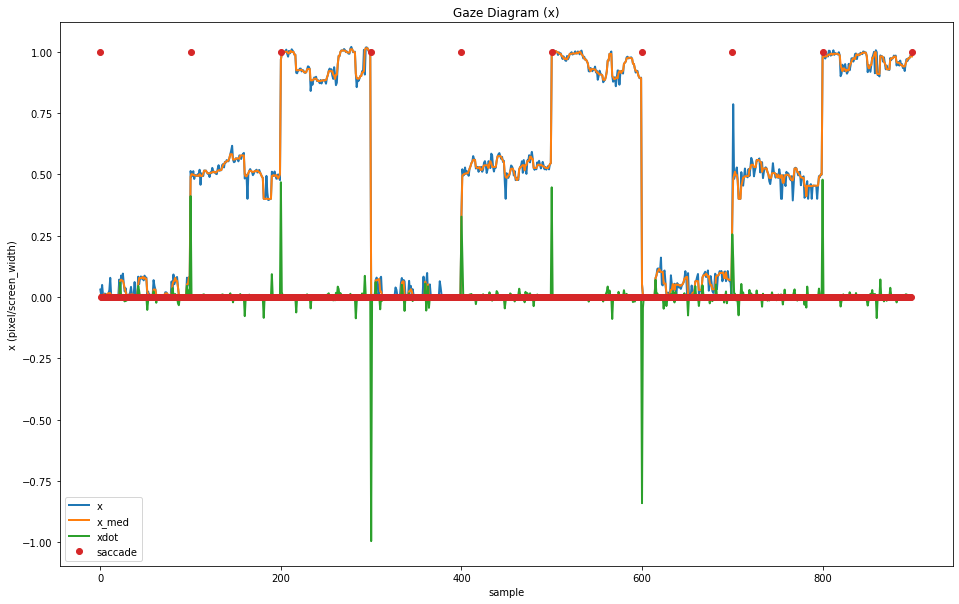

In [21]:
fig = plt.figure(figsize=(16, 10))
plt.plot(x, linewidth=2, label="x")
plt.plot(x_med, linewidth=2, label="x_med")
plt.plot(vx, linewidth=2, label="xdot")
plt.plot(sac_plot, 'o', label="saccade")
plt.legend()
plt.title("Gaze Diagram (x)")
plt.xlabel("sample")
plt.ylabel("x (pixel/screen_width)")

Text(0, 0.5, 'y (pixel/screen_width)')

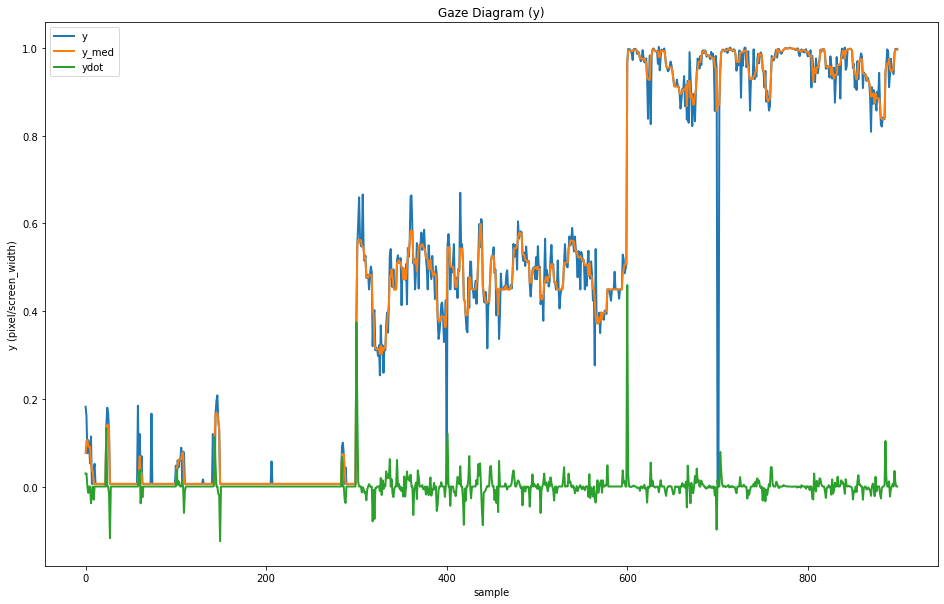

In [10]:
fig = plt.figure(figsize=(16, 10))
plt.plot(y, linewidth=2, label="y")
plt.plot(y_med, linewidth=2, label="y_med")
plt.plot(ydot, linewidth=2, label="ydot")
plt.legend()
plt.title("Gaze Diagram (y)")
plt.xlabel("sample")
plt.ylabel("y (pixel/screen_width)")